In [1]:
#All esential Imports ...
import matplotlib.pyplot as plt
%matplotlib inline 
import pylab as pl
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

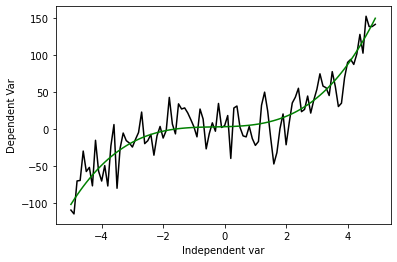

In [5]:
Xinputs = np.arange(-5.0,5.0,0.1)
Youtputs = 1*(Xinputs**3) + 1*(Xinputs**2) + 1*Xinputs + 3
Y_Noise = 20 * np.random.normal(size = Xinputs.size)
YData = Y_Noise + Youtputs
plt.plot(Xinputs,YData,'black')
plt.plot(Xinputs , Youtputs , 'green')
plt.ylabel('Dependent Var')
plt.xlabel('Independent var')
plt.show()

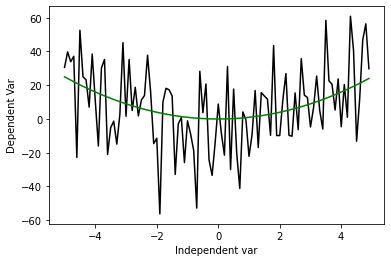

In [7]:
Xinputs = np.arange(-5.0,5.0,0.1)
Youtputs =  np.power(Xinputs,2)
Y_Noise = 20 * np.random.normal(size = Xinputs.size)
YData = Y_Noise + Youtputs
plt.plot(Xinputs,YData,'black')
plt.plot(Xinputs , Youtputs , 'green')
plt.ylabel('Dependent Var')
plt.xlabel('Independent var')
plt.show()

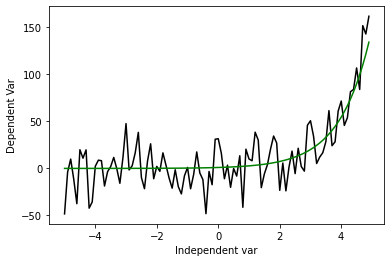

In [9]:
Xinputs = np.arange(-5.0,5.0,0.1)
Youtputs =  np.exp(Xinputs)
Y_Noise = 20 * np.random.normal(size = Xinputs.size)
YData = Y_Noise + Youtputs
plt.plot(Xinputs,YData,'black')
plt.plot(Xinputs , Youtputs , 'green')
plt.ylabel('Dependent Var')
plt.xlabel('Independent var')
plt.show()

C:\Users\ABTIN\AppData\Local\Temp/ipykernel_9612/765569637.py:2: RuntimeWarning: invalid value encountered in log
  Youtputs =  np.log(Xinputs)


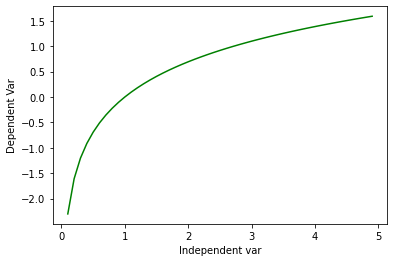

In [13]:
Xinputs = np.arange(-5.0,5.0,0.1)
Youtputs =  np.log(Xinputs)
plt.plot(Xinputs , Youtputs , 'green')
plt.ylabel('Dependent Var')
plt.xlabel('Independent var')
plt.show()

C:\Users\ABTIN\AppData\Local\Temp/ipykernel_9612/3055680635.py:2: RuntimeWarning: invalid value encountered in power
  Youtputs =  2+18/(6+np.power(Xinputs,Xinputs-2))


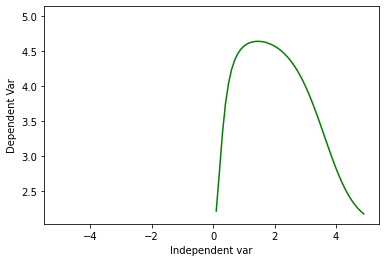

In [14]:
Xinputs = np.arange(-5.0,5.0,0.1)
Youtputs =  2+18/(6+np.power(Xinputs,Xinputs-2))
plt.plot(Xinputs , Youtputs , 'green')
plt.ylabel('Dependent Var')
plt.xlabel('Independent var')
plt.show()

In [22]:
#read csv file (China GDP)
allData = pd.read_csv("china_gdp.csv",encoding = "ISO-8859-1",low_memory=False)
allData.tail(10)#take a simple look on file

,Year,Value
45,2005,2.268599e+12
46,2006,2.729784e+12
47,2007,3.523094e+12
48,2008,4.558431e+12
49,2009,5.059420e+12
50,2010,6.039659e+12
51,2011,7.492432e+12
52,2012,8.461623e+12
53,2013,9.490603e+12
54,2014,1.035483e+13


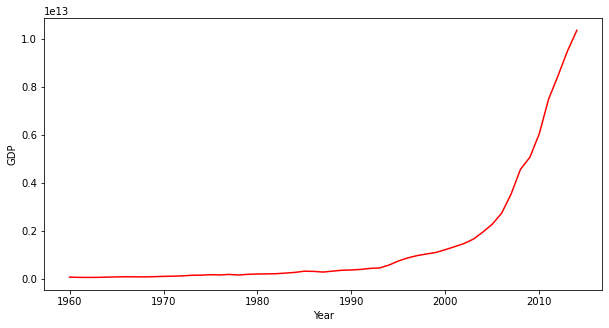

In [21]:
plt.figure(figsize=(10,5))
xData,yData = (allData['Year'].values , allData['Value'].values)
plt.plot(xData,yData,'r')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [23]:
def sigmoid(x,Beta1,Beta2):
    y = 1/(1+np.exp(-Beta1*(x-Beta2)))
    return y

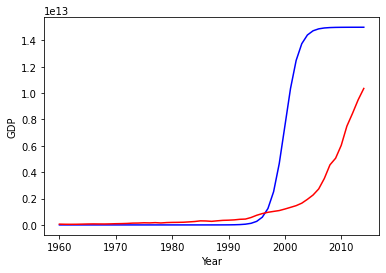

In [29]:
#our first try to find betas ...
Beta1=0.8
Beta2=2000.0
#EXP Logistic FUNC
yPrediction = sigmoid(xData,Beta1,Beta2)
plt.plot(xData,yPrediction*15000000000000.,"blue")
plt.plot(xData,yData,'r')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [32]:
#normalized x [1900 ... 2000] --> [0 ... 1]
normalX = xData/max(xData)
normalY = yData/max(yData)
normalX

array([0.97318769, 0.97368421, 0.97418073, 0.97467726, 0.97517378,
       0.97567031, 0.97616683, 0.97666336, 0.97715988, 0.97765641,
       0.97815293, 0.97864945, 0.97914598, 0.9796425 , 0.98013903,
       0.98063555, 0.98113208, 0.9816286 , 0.98212512, 0.98262165,
       0.98311817, 0.9836147 , 0.98411122, 0.98460775, 0.98510427,
       0.98560079, 0.98609732, 0.98659384, 0.98709037, 0.98758689,
       0.98808342, 0.98857994, 0.98907646, 0.98957299, 0.99006951,
       0.99056604, 0.99106256, 0.99155909, 0.99205561, 0.99255214,
       0.99304866, 0.99354518, 0.99404171, 0.99453823, 0.99503476,
       0.99553128, 0.99602781, 0.99652433, 0.99702085, 0.99751738,
       0.9980139 , 0.99851043, 0.99900695, 0.99950348, 1.        ])

In [34]:
from scipy.optimize import curve_fit
popt , pov = curve_fit(sigmoid,normalX,normalY)
print("Beta 1:%f, Beta 2:%f"%(popt[0],popt[1]))

Beta 1:690.451712, Beta 2:0.997207


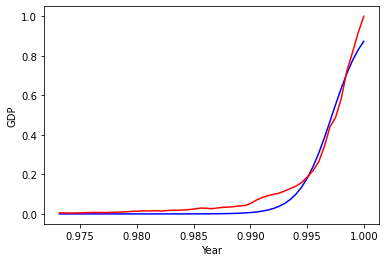

In [46]:
#the best simple modle for  this exp out puts ...
#EXP Logistic FUNC --> best prediction
yPrediction = sigmoid(normalX,*popt)
plt.plot(normalX,yPrediction,"blue")
plt.plot(normalX,normalY,'r')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()